#### Naive Bayes classification implementation

***Problem Identification***
- mission is to predict which of the previous customers will buy a brand new car released by the company
- Using the given [DataSet](../dataFiles/Social_Network_Ads.csv)
- Features include: Age, EstimatedSalary as independent variables
- Purchased - as the dependent variable

- model should predict for new customers of a given age and salary range the model should make a prediction, these customers can then be targetted by the relevant marketing Ads

***Importing libraries***

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

***Importing the Dataset***

In [3]:
dataset = pd.read_csv("../dataFiles/Social_Network_Ads.csv")
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
print(f'{x[:10]}\n{y[:10]}') # print first 10 records for testing purposes

[[    19  19000]
 [    35  20000]
 [    26  43000]
 [    27  57000]
 [    19  76000]
 [    27  58000]
 [    27  84000]
 [    32 150000]
 [    25  33000]
 [    35  65000]]
[0 0 0 0 0 0 0 1 0 0]


***Splitting the dataset into the Training Set and the Test Set***

In [4]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

***Feature Scaling***

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)
print(f'{x_train[:10]} \n{x_test[:10]}')


[[-1.06675246 -0.38634438]
 [ 0.79753468 -1.22993871]
 [ 0.11069205  1.853544  ]
 [ 0.60129393 -0.90995465]
 [ 1.87685881 -1.28811763]
 [-0.57615058  1.44629156]
 [ 0.3069328  -0.53179168]
 [ 0.99377543  0.10817643]
 [-1.16487283  0.45724994]
 [-1.55735433  0.31180264]] 
[[ 0.80285749 -1.39649711]
 [ 1.93579072  0.62530293]
 [-0.76581929 -0.72256376]
 [ 0.97715491  0.8703696 ]
 [-0.67867058 -1.21269711]
 [-0.59152187 -0.17116375]
 [ 0.8900062   1.20733627]
 [-0.67867058  0.47213626]
 [ 0.27996523  0.22706959]
 [ 0.45426265 -0.07926375]]


***Training the Naive Bayes model on the Training Set***

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

***Predicting a new result***

In [7]:
print(classifier.predict(sc.transform([[30, 87]])))

[0]


***Predicting the test set Results and printing them side by side***

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test),1)),1))

***Making the confusion Matrix***

In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[48  4]
 [ 3 25]]


0.9125

***Visualising the Training set results***

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6788\3142980585.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


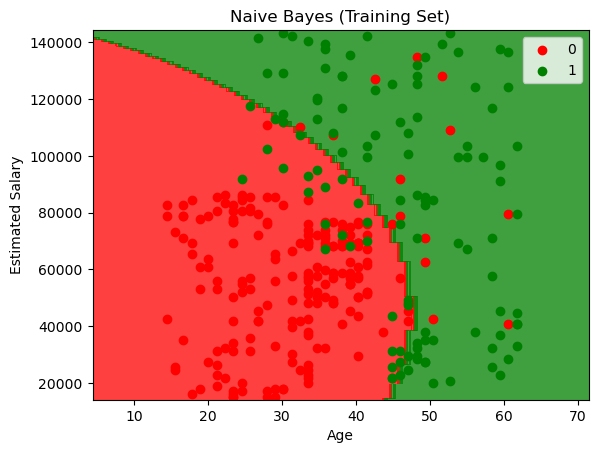

In [13]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_train), y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step= 1),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 1))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes (Training Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

***Visualising the Test Set Results***

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_6788\1466389797.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


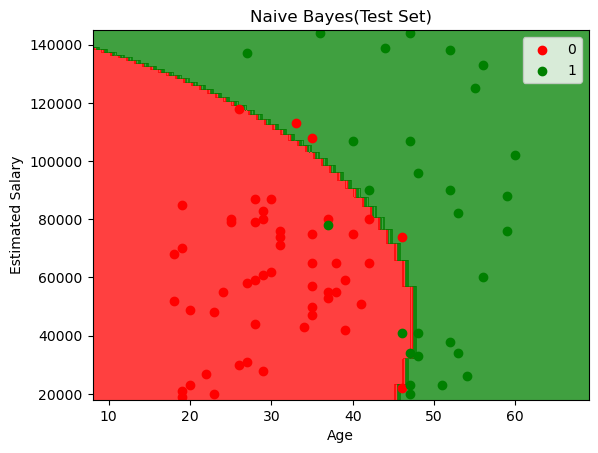

In [12]:
from matplotlib.colors import ListedColormap
x_set, y_set = sc.inverse_transform (x_test), y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:,0].min() - 10, stop=x_set[:,0].max() + 10, step= 1),
                     np.arange(start =x_set[:,1].min() - 1000, stop = x_set[:,1].max() + 1000, step = 1))
plt.contourf(x1,x2, classifier.predict(sc.transform(np.array([x1.ravel(), x2.ravel()]).T)).reshape(x1.shape),
                                      alpha = 0.75, cmap=ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Naive Bayes(Test Set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()